In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import timedelta
from IPython.display import Image, display
import pandas as pd
import seaborn as sns
%matplotlib inline

## Read Data

In [2]:
filename = '/home/sbarc/students/nash/data/IVT_MERRA2/MERRA2_arcatalog_1980-2015.csv'
df1 = pd.read_csv(filename, header=0, parse_dates=True)
df1

,Year,Month,Day,Hour,Length,Width,Centroid_lon,Centroid_lat,Equatorward_lon,Equatorward_Lat,...,Poleward_lon,zonal_ivt,meridional_ivt,direction,coherence,landfall_lon,landfall_lat,landfall_ivt_zonal,landfall_ivt_meridional,landfall_direction
0,1980,1,1,0,4514.9,480.6,125.087,-53.811,107.500,-39.0,...,-64.5,265.0,-175.1,123.450,0.842,114.375,-66.0,-159.9,39.0,283.717
1,1980,1,1,0,4612.5,445.1,120.038,-6.502,138.750,-6.0,...,-7.5,494.1,-77.8,98.947,0.994,138.125,-6.0,513.1,-58.4,96.492
2,1980,1,1,0,6867.4,461.6,306.259,40.570,277.500,23.5,...,52.5,189.3,139.4,53.624,0.777,292.500,62.0,-96.6,140.6,325.510
3,1980,1,1,0,2508.6,466.4,228.491,-42.384,218.750,-35.0,...,-51,434.2,-283.3,123.123,1.000,NaN,NaN,NaN,NaN,NaN
4,1980,1,1,0,2752.0,453.9,181.821,-37.693,181.875,-25.5,...,-47.5,47.0,-418.6,173.596,1.000,NaN,NaN,NaN,NaN,NaN
5,1980,1,1,0,2706.3,158.7,157.064,-39.217,143.750,-31.5,...,-46.5,369.6,-135.6,110.141,1.000,NaN,NaN,NaN,NaN,NaN
6,1980,1,1,0,2539.0,884.2,61.017,-38.447,51.875,-29.0,...,-45,342.0,-538.5,147.580,0.976,NaN,NaN,NaN,NaN,NaN
7,1980,1,1,0,2191.7,189.3,349.268,-43.041,334.375,-41.0,...,-44,637.4,-65.7,95.883,1.000,NaN,NaN,NaN,NaN,NaN
8,1980,1,1,0,3820.8,1140.0,319.593,-28.356,305.625,-16.5,...,-37,198.7,-313.3,147.621,0.691,NaN,NaN,NaN,NaN,NaN
9,1980,1,1,0,5736.8,667.3,21.581,39.257,352.500,41.0,...,51.5,184.4,102.8,60.874,0.676,NaN,NaN,NaN,NaN,NaN


That's a lot of data! Let's create a function that selects only the rows from the dataframe that have central latitude and longitude values within the specified bounding box.

In [3]:
def subset_df(df, lat_min, lat_max, lon_min, lon_max):
    new_df = df[
        (df.loc[:, 'Centroid_lat'] >= lat_min) & (df.loc[:,'Centroid_lat'] <= lat_max) 
        & (df.loc[:, 'Centroid_lon'] >= lon_min) & (df.loc[:, 'Centroid_lon'] <= lon_max)]
    
    return new_df

In [4]:
## subset the dataframe using the function
## Region 1
R01 = subset_df(df1, lat_min=30.0, lat_max=40.0, lon_min=65.0, lon_max=75.0)

## Region 2
R02 = subset_df(df1, lat_min=25.0, lat_max=35.0, lon_min=75.0, lon_max=85.0)
R02

,Year,Month,Day,Hour,Length,Width,Centroid_lon,Centroid_lat,Equatorward_lon,Equatorward_Lat,...,Poleward_lon,zonal_ivt,meridional_ivt,direction,coherence,landfall_lon,landfall_lat,landfall_ivt_zonal,landfall_ivt_meridional,landfall_direction
8297,1980,6,21,0,2562.5,540.8,82.841,25.427,90.625,21.0,...,-31.5,356.8,218.2,301.452,0.799,NaN,NaN,NaN,NaN,NaN
8306,1980,6,21,6,2082.0,526.2,82.482,25.294,91.250,22.5,...,-24.5,405.1,226.5,299.209,0.773,NaN,NaN,NaN,NaN,NaN
8346,1980,6,22,0,2894.6,576.7,79.506,26.030,93.750,20.0,...,-27,285.2,89.2,287.373,0.677,NaN,NaN,NaN,NaN,NaN
8370,1980,6,22,12,3080.3,509.7,80.417,25.311,93.125,21.0,...,-26,250.5,67.6,285.098,0.517,NaN,NaN,NaN,NaN,NaN
10030,1980,7,23,6,2196.3,357.6,83.198,26.318,90.625,22.0,...,-31,461.8,183.1,291.634,0.993,NaN,NaN,NaN,NaN,NaN
10259,1980,7,27,6,2397.2,340.9,81.378,26.971,88.125,23.5,...,-27.5,317.0,157.3,296.387,0.807,NaN,NaN,NaN,NaN,NaN
10624,1980,8,3,0,2504.1,539.9,81.929,25.445,88.750,19.5,...,-34,427.5,179.6,292.785,0.870,NaN,NaN,NaN,NaN,NaN
10659,1980,8,3,12,2974.9,602.4,81.754,25.479,94.375,18.5,...,-26.5,381.3,150.2,291.505,0.831,NaN,NaN,NaN,NaN,NaN
13189,1980,9,20,12,2979.8,332.3,82.796,26.176,77.500,24.0,...,32,139.5,128.8,47.275,0.514,NaN,NaN,NaN,NaN,NaN
22258,1981,3,30,6,2838.7,376.7,76.118,25.546,62.500,22.5,...,27.5,172.8,63.1,69.934,0.856,NaN,NaN,NaN,NaN,NaN


Notice that we only have 299 rows now within subregion R02, down from 648240. Now I want to assign each AR "event" an ID number so that I can track the number of events. We consider each AR to be a part of the same "event" if the central latitude and longitude moves less than 5 degrees in any direction between the 6 hour timesteps.

In [5]:
def new_event_id(df):
    ## Add columns to calculate difference in time, lat, and lon
    df.loc[:,'times_list'] = pd.to_datetime(df.loc[:,('Year', 'Month', 'Day', 'Hour')])
    df.loc[:,'time_diff'] = df['times_list'] - df['times_list'].shift(1)
    df.loc[:,'diff_lat'] =  df['Centroid_lat'] - df['Centroid_lat'].shift(1)
    df.loc[:,'diff_lon'] =  df['Centroid_lon'] - df['Centroid_lon'].shift(1)
    
    ## Add column of total IVT
    df.loc[:,"total_IVT"] = np.sqrt(np.square(df['meridional_ivt']) + np.square(df['zonal_ivt']))
    
    ## Add columns of old_idx and new_idx (to track the AR event)
    sLength = len(df['Day'])
    df.loc[:,'old_idx'] = pd.Series(np.arange(1, sLength+1), index=df.index)
    df.loc[:,'new_idx'] = pd.Series(np.arange(1, sLength+1), index=df.index)
    
    ## Create mask of AR objects that meet the criteria
    mask = ((df['time_diff'] <= timedelta(0, hours=6)) & (df['diff_lat'] <= 5.0) & (df['diff_lat'] >= -5.0)
        & (df['diff_lon'] <= 5.0) & (df['diff_lon'] >= -5.0))
    
    ## Mask new_idx objects that meet the criteria with NaN
    df['new_idx'] = df['new_idx'].mask(mask, np.nan)
    ## Propagate previous value forward to fill NaN
    df['new_idx'].fillna(method='ffill', inplace=True)
    
    return df

In [6]:
R01 = new_event_id(R01)
R02 = new_event_id(R02)
R01

/home/nash/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/nash/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/nash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,Year,Month,Day,Hour,Length,Width,Centroid_lon,Centroid_lat,Equatorward_lon,Equatorward_Lat,...,landfall_ivt_zonal,landfall_ivt_meridional,landfall_direction,times_list,time_diff,diff_lat,diff_lon,total_IVT,old_idx,new_idx
1103,1980,1,25,0,2251.1,660.7,67.464,30.595,58.750,26.5,...,NaN,NaN,NaN,1980-01-25 00:00:00,NaT,NaN,NaN,178.997486,1,1.0
1114,1980,1,25,6,2208.4,422.5,69.899,30.674,61.875,28.0,...,NaN,NaN,NaN,1980-01-25 06:00:00,0 days 06:00:00,0.079,2.435,167.129680,2,1.0
3529,1980,3,17,6,2014.4,364.1,65.005,30.308,58.750,26.0,...,NaN,NaN,NaN,1980-03-17 06:00:00,52 days 00:00:00,-0.366,-4.894,186.898609,3,3.0
4421,1980,4,5,6,3356.3,616.6,65.755,39.636,50.625,40.5,...,NaN,NaN,NaN,1980-04-05 06:00:00,19 days 00:00:00,9.328,0.750,224.024307,4,4.0
5598,1980,4,30,6,6510.7,593.4,72.468,39.725,45.625,27.5,...,NaN,NaN,NaN,1980-04-30 06:00:00,25 days 00:00:00,0.089,6.713,177.647657,5,5.0
6127,1980,5,10,18,2362.7,384.7,69.169,39.579,64.375,31.0,...,NaN,NaN,NaN,1980-05-10 18:00:00,10 days 12:00:00,-0.146,-3.299,190.667905,6,6.0
7887,1980,6,13,0,2251.4,253.3,72.810,31.787,66.875,25.5,...,NaN,NaN,NaN,1980-06-13 00:00:00,33 days 06:00:00,-7.792,3.641,149.675015,7,7.0
10939,1980,8,8,6,2208.1,162.5,74.025,39.773,64.375,36.5,...,NaN,NaN,NaN,1980-08-08 06:00:00,56 days 06:00:00,7.986,1.215,125.327451,8,8.0
18564,1981,1,13,0,5084.5,426.7,66.616,39.038,53.125,27.5,...,NaN,NaN,NaN,1981-01-13 00:00:00,157 days 18:00:00,-0.735,-7.409,194.257252,9,9.0
22216,1981,3,29,6,2976.7,796.9,67.363,38.350,53.750,39.5,...,NaN,NaN,NaN,1981-03-29 06:00:00,75 days 06:00:00,-0.688,0.747,114.471874,10,10.0


Let's get some counts to confirm our indexing worked.

In [7]:
print('Number of AR timesteps: ',  R01.old_idx.nunique())
print( '# of unique AR events:', R01.new_idx.nunique())
print('Mean of IVT for all events:', R01.total_IVT.mean())
print('Min IVT: ', R01['total_IVT'].min(), 'Max IVT:', R01['total_IVT'].max())

Number of AR timesteps:  398
# of unique AR events: 283
Mean of IVT for all events: 180.79726350563539
Min IVT:  99.67993780094368 Max IVT: 266.11674129975364


## Create AR Event Frequency Barplot

Group AR events into categories based on IVT strength and month, and then count the number of events

In [8]:
def ar_ivt_categories(df):
    bins = np.arange(0, 1500, 250)
    ar_category = pd.cut(df['total_IVT'], bins=bins, precision=1, 
                         labels=['<250 kg m-1 s-1', '>250-500 kg m-1 s-1', 
                                 '>500-750 kg m-1 s-1', '>750-1000 kg m-1 s-1', 
                                 '>1000-1250 kg m-1 s-1'])
    new_df = df.groupby([(ar_category), 'Month']).nunique()
    ar_ivt = new_df['new_idx']
    
    return ar_ivt, bins

In [9]:
ivtcat_R01, ivt_bins_R01 = ar_ivt_categories(R01)
ivtcat_R02, ivt_bins_R02 = ar_ivt_categories(R02)
ivtcat_R01

total_IVT            Month
<250 kg m-1 s-1      1        20
                     2        22
                     3        53
                     4        51
                     5        17
                     6         8
                     7         7
                     8         7
                     9         3
                     10       24
                     11       35
                     12       36
>250-500 kg m-1 s-1  2         1
                     3         1
                     12        1
Name: new_idx, dtype: int64

In [10]:
df2 = pd.concat([ivtcat_R01.rename('R01'), ivtcat_R02.rename('R02')], axis=1)
df2

R01   R02
total_IVT           Month            
<250 kg m-1 s-1     1      20.0  14.0
                    2      22.0  15.0
                    3      53.0  11.0
                    4      51.0  10.0
                    5      17.0   NaN
                    6       8.0   2.0
                    7       7.0  23.0
                    8       7.0  25.0
                    9       3.0  15.0
                    10     24.0   1.0
                    11     35.0   3.0
                    12     36.0   5.0
>250-500 kg m-1 s-1 1       NaN   1.0
                    2       1.0   2.0
                    3       1.0   6.0
                    4       NaN   3.0
                    5       NaN   2.0
                    6       NaN   8.0
                    7       NaN  28.0
                    8       NaN  44.0
                    9       NaN  16.0
                    10      NaN   3.0
                    11      NaN   1.0
                    12      1.0   NaN
>500-750 kg m-1 s-1 7       NaN   3.0
                    8       NaN   3.0

Make the dataframe ["tidy"](http://shzhangji.com/blog/2017/09/30/pandas-and-tidy-data/) for easy plotting with seaborn.

In [11]:
df2 = df2.reset_index()
df2 = pd.melt(df2, id_vars=['Month', 'total_IVT'], var_name='subregion', value_name='frequency')
df2

,Month,total_IVT,subregion,frequency
0,1,<250 kg m-1 s-1,R01,20.0
1,2,<250 kg m-1 s-1,R01,22.0
2,3,<250 kg m-1 s-1,R01,53.0
3,4,<250 kg m-1 s-1,R01,51.0
4,5,<250 kg m-1 s-1,R01,17.0
5,6,<250 kg m-1 s-1,R01,8.0
6,7,<250 kg m-1 s-1,R01,7.0
7,8,<250 kg m-1 s-1,R01,7.0
8,9,<250 kg m-1 s-1,R01,3.0
9,10,<250 kg m-1 s-1,R01,24.0


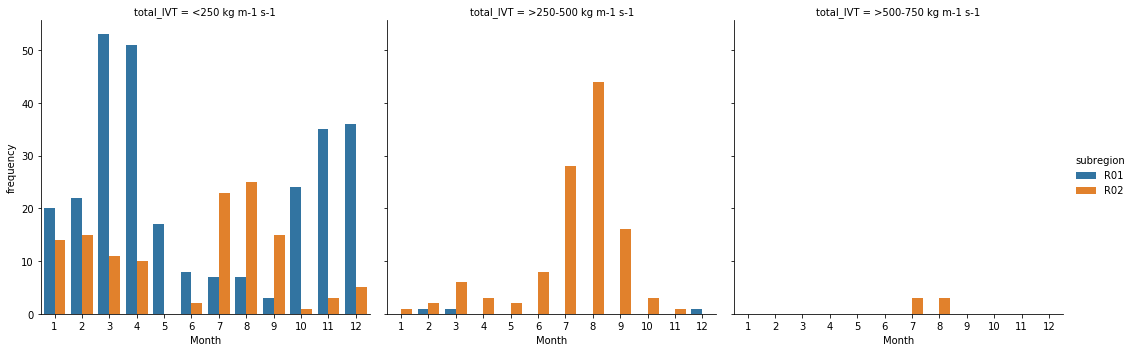

In [12]:
sns.catplot(x='Month', y='frequency', hue='subregion', col='total_IVT',
            data=df2, kind='bar')

